In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
import joblib
from sklearn.metrics import mean_squared_error

In [2]:
# 1、读取数据
path ="C:\\Users\\Koo-Hung CHA\\Desktop\\test\\20220808.csv"
testData = pd.read_csv(path)
#print(testData)
# 2、划分数据集
from sklearn.model_selection import train_test_split
x = testData.iloc[:, 1:-1]
y = testData["level"]
# 2）划分数据集
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3)
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)
# 加载模型
estimator = joblib.load("my_ridge.pkl")

In [3]:
# 6）模型评估
y_predict = estimator.predict(x_test)
print("预测值：\n", y_predict)
error = mean_squared_error(y_test, y_predict)
print("岭回归-均方误差为：\n", error)

预测值：
 [1.06865465 1.06865465 1.1200027  1.08405906 1.06865465 1.06865465
 1.06865465 1.06865465 1.06865465 1.06865465 1.06865465 1.06865465
 1.06865465 1.06865465 1.06865465 1.06865465 1.06865465 1.06865465
 1.06865465 1.06865465 1.21096209 1.07214083 1.08332552 1.06865465
 1.06865465 1.06865465 1.06865465 1.06865465 1.06865465 4.01231584
 1.06865465 1.06865465 1.06865465 1.06865465 1.06865465 1.06865465
 1.31805945 1.20215957 1.06865465 1.06865465 1.06865465 1.24030384
 1.06865465 1.06865465 1.06865465 1.06865465 1.06865465 1.09359513
 1.06865465 1.06865465 1.06865465 1.06865465 1.06865465 1.06865465
 1.06865465 1.06865465 1.06865465]
岭回归-均方误差为：
 1.2917087368172708


In [4]:
x_test1=[[8,1]] #测试的数据
x_test1= transfer.transform(x_test1)
y_predict1 = estimator.predict(x_test1)
y_test1 = [1]
print("预测房价：\n", y_predict1)
error = mean_squared_error(y_test1, y_predict1)
print("岭回归-均方误差为：\n", error)

预测房价：
 [1.12908122]
岭回归-均方误差为：
 0.016661961394074033


In [5]:
# 导入库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [6]:
# 生成训练集和测试集
def f(x1,x2):
    """ 使用岭回归拟合的函数"""
    return x1 *0.09049682+ x2*0.72414776+0.49710982658959535
# 为了画函数曲线生成的数据
x_plot = np.linspace(0, 20, 30)
# 生成训练集
x = np.linspace(0, 20, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:30])
x2=np.random.randint(0,2,30)
y = f(x,x2)
# 转换为矩阵形式
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

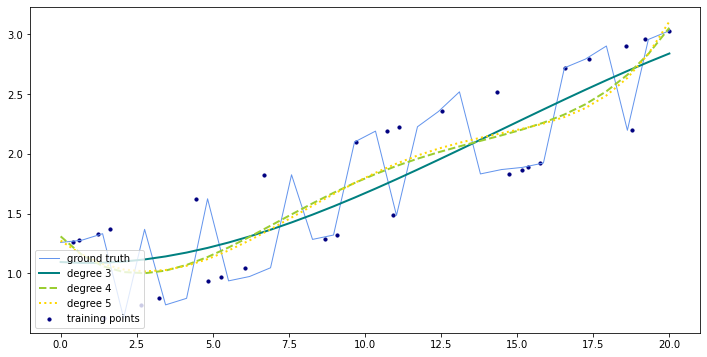

In [7]:
# 可视化
colors = ['teal', 'yellowgreen', 'gold']
linestyles=["-","--",":"]
# lw = 2
fig = plt.figure(figsize=(12,6))
plt.plot(x_plot, y, color='cornflowerblue', linewidth=1,
         label="ground truth")
plt.scatter(x, y, color='navy', s=10, marker='o', label="training points")
for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linestyle=linestyles[count],linewidth=2,
             label="degree %d" % degree)
    plt.legend(loc='lower left')

plt.savefig('33.pdf')
plt.show()